_______________
# Warm-up stuff for financial analysis with python #
Practice and notes from online course: 
[Python for Financial Analysis and Algorithmic Trading](https://www.udemy.com/python-for-finance-and-trading-algorithms/learn/v4/content) <br>
Comments are just my understanding, mostly
### Datetime, dataframe.resample(), Bollinger bands, Pandas.datareader, etc ###
### OHLC, Volume, Adj.Close, 
__________________


### Datetime in dateframe ###
_______________


In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
my_year = 2017
my_month = 1
my_day = 2
my_hour = 12
my_minute = 15
my_second = 30
my_datetime = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)
my_datetime2 = datetime(2015, 7, 9)
print(my_datetime)
print(my_datetime2)
print(my_datetime.minute)

2017-01-02 12:15:30
2015-07-09 00:00:00
15


In [4]:
dates = [datetime(2016, 1, 3), datetime(2016,1,4)]
data = np.random.randn(2,2)
df = pd.DataFrame(data, index=dates, columns=dates)
print(df)
print(df.index.max())
print(type(df.index[0]))

            2016-01-03  2016-01-04
2016-01-03    0.770488   -2.448408
2016-01-04    0.991131   -0.110912
2016-01-04 00:00:00
<class 'pandas._libs.tslib.Timestamp'>


____________
### Clean data with timestamp (better with read_csv options), and resample ###
___________

In [5]:
df2 = pd.read_csv("walmart_stock.csv")
df2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [6]:
print(type(df2.loc[0]['Date']))

<class 'str'>


In [7]:
df2['Date'] = df2['Date'].apply(pd.to_datetime)
df2.set_index('Date', inplace=True)    # can only run once; error if run more than once without reload data
print(type(df2.index[0]))
df2.head()

<class 'pandas._libs.tslib.Timestamp'>


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


______________
## Best way to reindex and to_datatime in one step during loading data ##

In [8]:
df2 = pd.read_csv("walmart_stock.csv", index_col='Date', parse_dates=True)
df2.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


_________________
#### The rule in dataframe.resample(): ####
_________________________

<table border="1" class="docutils">
<colgroup>
<col width="13%" />
<col width="87%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Alias</th>
<th class="head">Description</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>B</td>
<td>business day frequency</td>
</tr>
<tr class="row-odd"><td>C</td>
<td>custom business day frequency (experimental)</td>
</tr>
<tr class="row-even"><td>D</td>
<td>calendar day frequency</td>
</tr>
<tr class="row-odd"><td>W</td>
<td>weekly frequency</td>
</tr>
<tr class="row-even"><td>M</td>
<td>month end frequency</td>
</tr>
<tr class="row-odd"><td>SM</td>
<td>semi-month end frequency (15th and end of month)</td>
</tr>
<tr class="row-even"><td>BM</td>
<td>business month end frequency</td>
</tr>
<tr class="row-odd"><td>CBM</td>
<td>custom business month end frequency</td>
</tr>
<tr class="row-even"><td>MS</td>
<td>month start frequency</td>
</tr>
<tr class="row-odd"><td>SMS</td>
<td>semi-month start frequency (1st and 15th)</td>
</tr>
<tr class="row-even"><td>BMS</td>
<td>business month start frequency</td>
</tr>
<tr class="row-odd"><td>CBMS</td>
<td>custom business month start frequency</td>
</tr>
<tr class="row-even"><td>Q</td>
<td>quarter end frequency</td>
</tr>
<tr class="row-odd"><td>BQ</td>
<td>business quarter endfrequency</td>
</tr>
<tr class="row-even"><td>QS</td>
<td>quarter start frequency</td>
</tr>
<tr class="row-odd"><td>BQS</td>
<td>business quarter start frequency</td>
</tr>
<tr class="row-even"><td>A</td>
<td>year end frequency</td>
</tr>
<tr class="row-odd"><td>BA</td>
<td>business year end frequency</td>
</tr>
<tr class="row-even"><td>AS</td>
<td>year start frequency</td>
</tr>
<tr class="row-odd"><td>BAS</td>
<td>business year start frequency</td>
</tr>
<tr class="row-even"><td>BH</td>
<td>business hour frequency</td>
</tr>
<tr class="row-odd"><td>H</td>
<td>hourly frequency</td>
</tr>
<tr class="row-even"><td>T, min</td>
<td>minutely frequency</td>
</tr>
<tr class="row-odd"><td>S</td>
<td>secondly frequency</td>
</tr>
<tr class="row-even"><td>L, ms</td>
<td>milliseconds</td>
</tr>
<tr class="row-odd"><td>U, us</td>
<td>microseconds</td>
</tr>
<tr class="row-even"><td>N</td>
<td>nanoseconds</td>
</tr>
</tbody>
</table>

In [9]:
print(df2.shape)
df2.resample(rule='A').mean()   # annual average, with last calendar day as datetime

(1258, 6)


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,67.158680,67.602120,66.786520,67.215120,9.239015e+06,59.389349
2013-12-31,75.264048,75.729405,74.843055,75.320516,6.951496e+06,68.147179
2014-12-31,77.274524,77.740040,76.864405,77.327381,6.515612e+06,71.709712
2015-12-31,72.569405,73.064167,72.034802,72.491111,9.040769e+06,68.831426
2016-12-31,69.481349,70.019643,69.023492,69.547063,9.371645e+06,68.054229


In [10]:
# cumstomize the resample calculations
def first_day(data):
    return data[0]    # return the first_day data

df2.resample(rule='A').apply(first_day)  # data of the first day of each year

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2013-12-31,68.930000,69.239998,68.449997,69.239998,10390800,61.879708
2014-12-31,78.720001,79.470001,78.500000,78.910004,6878000,72.254228
2015-12-31,86.269997,86.720001,85.550003,85.900002,4501800,80.624861
2016-12-31,60.500000,61.490002,60.360001,61.459999,11989200,59.289713


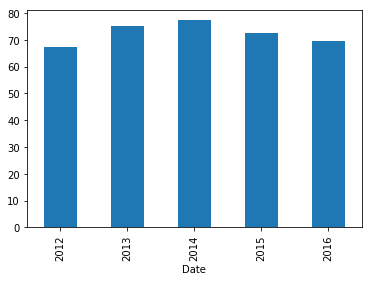

In [11]:
df3 = df2.resample(rule='A').mean()
df3.index = df3.index.year
df3['Close'].plot(kind='bar')

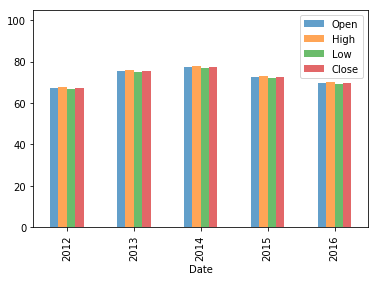

In [12]:
df3[['Open', 'High', 'Low', 'Close']].plot(kind='bar', alpha=0.7)
plt.ylim(0, 105);

In [13]:
df2.shift(1).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235
2012-01-05,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-06,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-09,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220


In [14]:
df2.shift(-1).tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.300003,69.820000,69.250000,69.699997,4435700.0,69.191240
2016-12-27,69.940002,70.000000,69.260002,69.309998,4875700.0,68.804087
2016-12-28,69.209999,69.519997,69.120003,69.260002,4298400.0,68.754456
2016-12-29,69.120003,69.430000,68.830002,69.120003,6889500.0,68.615479
2016-12-30,NaN,NaN,NaN,NaN,NaN,NaN


#### dataframe.tshift is weird. Shift the index in periods*freq ####

In [15]:
df2.tshift(freq='W',periods=2).head(20)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-15,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-15,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-15,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-15,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-22,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
2012-01-22,59.430000,59.709999,58.980000,59.040001,6907300,51.494109
2012-01-22,59.060001,59.529999,59.040001,59.400002,6365600,51.808098
2012-01-22,59.790001,60.000000,59.400002,59.500000,7236400,51.895316
2012-01-22,59.180000,59.610001,59.009998,59.540001,7729300,51.930204


#### Dataframe.rolling  (or Series.rolling) ####

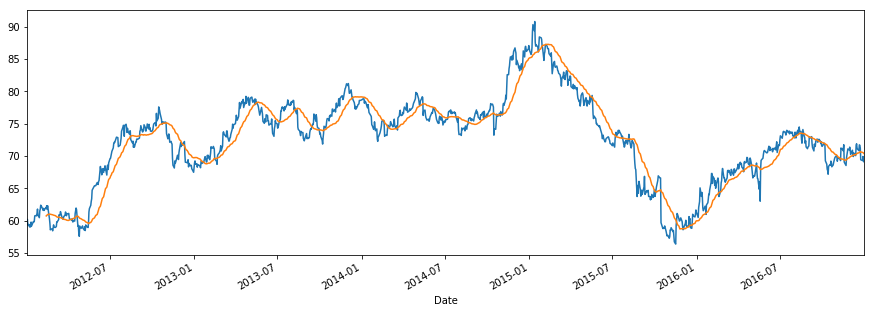

In [16]:
df2['Open'].plot(figsize=(15,5))
df2['Open'].rolling(window=30).mean().plot()

#### Automatic legend with (multi-col) dataframe plot: ####

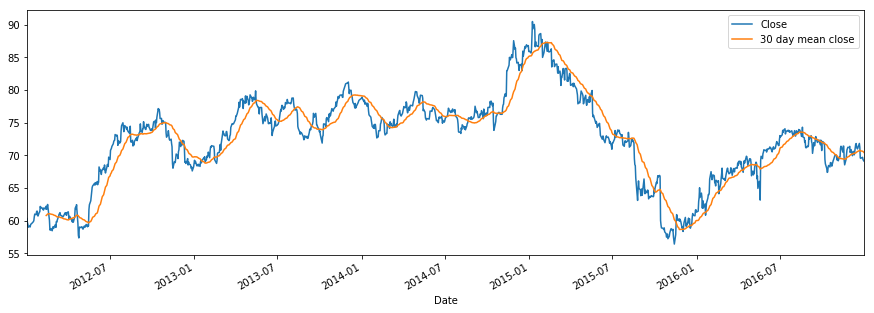

In [17]:
df2['30 day mean close'] = df2['Close'].rolling(30).mean()
df2[['Close', '30 day mean close']].plot(figsize=(15,5))

#### dataframe.expanding is another weird function: average each point from begainning. ####

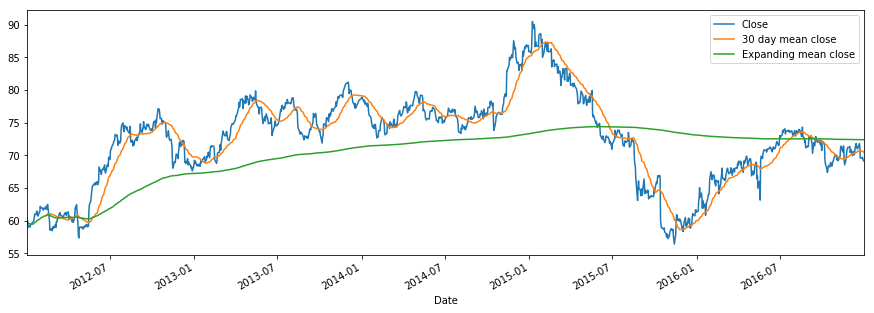

In [18]:
df2['Expanding mean close'] = df2['Close'].expanding().mean()
df2[['Close', '30 day mean close', 'Expanding mean close']].plot(figsize=(15,5))

### Bollinger Bands ###
(mostly 20 days?)

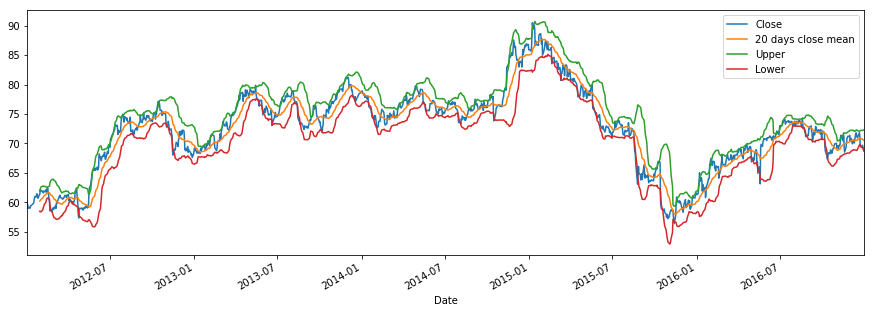

In [19]:
df2['20 days close mean'] = df2['Close'].rolling(window=20).mean()
df2['Upper'] = df2['20 days close mean'] + 2*df2['Close'].rolling(window=20).std()
df2['Lower'] = df2['20 days close mean'] - 2*df2['Close'].rolling(20).std()
df2[['Close', '20 days close mean', 'Upper', 'Lower']].plot(figsize=(15,5))

### Does pandas datareader work? ###
#### "google", "yahoo", "fred" all did not work, but fortunately. ####
#### "morningstar" works, only after tred and failed with "google" ####
_________________

In [20]:
import pandas_datareader.data as web

In [27]:
start = datetime(2015,1,1)
end = datetime(2017,1,1)
facebook = web.DataReader('FB', "morningstar", start, end)  #'google, 'fred", 'yahoo' did not work.

In [28]:
facebook.head()

Close     High     Low   Open    Volume
Symbol Date                                               
FB     2015-01-01  78.02  78.0200  78.020  78.02         0
       2015-01-02  78.45  78.9300  77.700  78.58  18177475
       2015-01-05  77.19  79.2455  76.860  77.98  26452191
       2015-01-06  76.15  77.5900  75.365  77.23  27399288
       2015-01-07  76.15  77.3600  75.820  76.76  22045333

In [ ]:
from pandas_datareader.data import Options  # to get more detailed data: ask, PctChg, etc

In [ ]:
# fb_options = Options('FB', 'yahoo')  # 'supposed to work with 'google' and 'yahoo', but both not work

In [30]:
print(start, end)

2015-01-01 00:00:00 2017-01-01 00:00:00
